# AeroFit Treadmill Business Case Study

**Business Problem** - The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

- To perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
- To construct two-way contingency tables for each AeroFit treadmill product and to compute all conditional and marginal probabilities along with their insights/impact on the business.

**About Aerofit** - Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Dataset** - The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months.The dataset has the following features:

- Product Purchased:	KP281, KP481, or KP781
- Age              :  In years
- Gender           :	Male/Female
- Education        :	In years
- MaritalStatus    :	Single or partnered
- Usage            :	The average number of times the customer plans to use the treadmill each week.
- Income           :	Annual income (in USD)
- Fitness          :	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
- Miles            :	The average number of miles the customer expects to walk/run each week

**Product Portfolio** -
- The KP281 is an entry-level treadmill that sells for USD 1,500.
- The KP481 is for mid-level runners that sell for USD 1,750.
- The KP781 treadmill is having advanced features that sell for USD 2,500.

**Importing required packages**

In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

**Loading data into Dataframe**

In [408]:
# Creating a deep copy and a shallow copy inorder to work on outliers and other messy data if any.

In [409]:
df = pd.read_csv('data/aerofit_treadmill.csv')
df_dcopy = df.copy(deep=True)
df_scopy = df.copy(deep=False)
df.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47

In [410]:
df.shape

(180, 9)

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [412]:
df.describe()

Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000

In [413]:
df.isna().sum()/len(df) *100

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64

In [414]:
df.duplicated().sum()

0

In [415]:
characteristics = df.columns.values
for i in characteristics :
    print(i,': ',df[i].unique())
    print()

Product :  ['KP281' 'KP481' 'KP781']

Age :  [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

Gender :  ['Male' 'Female']

Education :  [14 15 12 13 16 18 20 21]

MaritalStatus :  ['Single' 'Partnered']

Usage :  [3 2 4 5 6 7]

Fitness :  [4 3 2 1 5]

Income :  [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]

Miles :  [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]



In [416]:
# Changing datatype of Gender, MaritalStatus and Product from Object to Category.
characteristics_catg = ['Gender', 'MaritalStatus', 'Product']
for i in characteristics_catg:
    df[i] = df[i].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


**Observations** :
- We can conclude from above that, No null & duplicate value found in features.
- There are 3 different products in this dataset (KP281', 'KP481' ,'KP781').
- Age if customers range from 18 to 50.
- Education ranges from 12 to 21 (years).
- There are both Singles and Partenered as buyer.
- Usage ranges from 2 to 7 (days/week).
- Fitness level of customers ranges from 1-5.
- By changing the dtype from object to category, we are reducing the memory usage.

# **Outliers detection and removal**

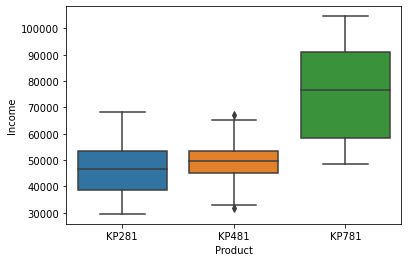

In [417]:
#Boxplot for Products and the Income of customers purchasing those products
sns.boxplot(data=df, x = 'Product', y = 'Income')
plt.show()

**Observations** : 
- KP781 Treadmill with advanced features is preffered by the customers with higher income.
- KP281 Treadmill with the lowest cost and basic features is preffered by the customers with lower income and the KP481 product with moderate features are liked by the customers with upper bracket of low - moderate income group.

**Inference** : 
- There aren't any significant outliers for Products and the Income of customers purchasing those products. So no need for outlier removal here.
- The target audience for KP781 Treadmill should be the higher income group. So the sales team must focus on this range.

**1.Outlier Handling for Income**:

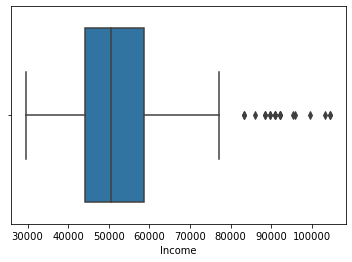

In [418]:
#Boxplot for Income of customers purchasing products before outlier removal
sns.boxplot(data=df, x = 'Income')
plt.show()

In [419]:
df['Income'].mean()

53719.57777777778

In [436]:
#I have used shallow copy of our dataframe for storing it's modified version after removing autliers
q1=df['Income'].quantile(.25)
q2=df['Income'].median()
q3=df['Income'].quantile(.75)
iqr=q3-q1 
df_scopy=df[(df['Income']>q1-1.5*iqr)&(df['Income']<q3+1.5*iqr)]
df_scopy.shape

(161, 9)

In [438]:
df.shape

(180, 9)

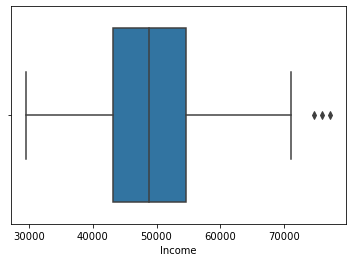

In [437]:
#Boxplot for Income of customers purchasing products after outlier removal
sns.boxplot(data=df_scopy, x = 'Income')
plt.show()

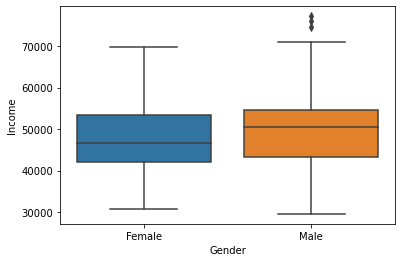

In [439]:
#Boxplot for Gender and the Income of customers purchasing products before outlier removal
sns.boxplot(data=df_scopy, x = 'Gender', y = 'Income')
plt.show()

In [440]:
df.groupby('Gender')['Income'].mean() # Mean before outlier removal

Gender
Female    49828.907895
Male      56562.759615
Name: Income, dtype: float64

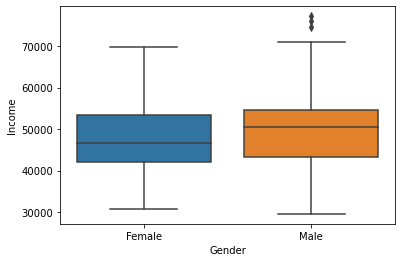

In [441]:
#Boxplot for Gender and the Income of customers purchasing products after outlier removal
sns.boxplot(data=df_scopy, x = 'Gender', y = 'Income')
plt.show()

In [442]:
df_scopy.groupby('Gender')['Income'].mean() # Mean before outlier removal

Gender
Female    48056.356164
Male      50000.840909
Name: Income, dtype: float64

**Observations**:
- After outlier removal for income, 19 rows are deleted and in order to draw some insights from the original data in future, stored the modied data in it's shallow copy - **df_scopy**
- In the boxplot, we can clearly see that most of the outliers are removed and the data is now ready for further analysis and inferences.


**2.Outlier Handling for Miles:**

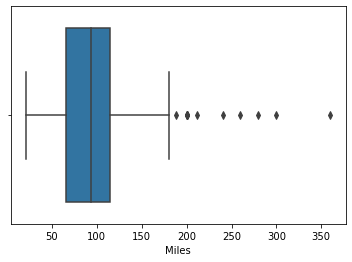

In [443]:
df_scopy1 = df
sns.boxplot(data = df_scopy1, x = 'Miles')
plt.show()

In [444]:
#I have used shallow copy of our dataframe for storing it's modified version after removing autliers
q1=df_scopy1['Miles'].quantile(.25)
q2=df_scopy1['Miles'].median()
q3=df_scopy1['Miles'].quantile(.75)
iqr=q3-q1 
df_scopy1=df_scopy1[(df_scopy1['Miles']>q1-1.5*iqr)&(df_scopy1['Miles']<q3+1.5*iqr)]
df_scopy1.shape

(167, 9)

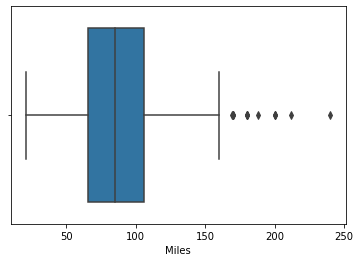

In [446]:
sns.boxplot(data = df_scopy, x = 'Miles')
plt.show()

**Observations**:
- After outlier removal for **Miles**, 13 rows are deleted and in order to draw some insights from the original data in future, stored the modied data in it's shallow copy - **df_scopy1**
- In the boxplot, we can clearly see that most of the outliers are removed and the data is now ready for further analysis and inferences.
- As of now we will be restricting drawing any insights from df_scopy1 and will be foxusing on df_scopy i.e DF obtained after handing outliers on Income column

# EDA - Univariate Analysis

**1.Numerical features**

In [447]:
df_scopy.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47

In [448]:
new_mean= round(df_scopy.mean(),2)
new_mean

Age             28.16
Education       15.35
Usage            3.27
Fitness          3.14
Income       49119.18
Miles           93.26
dtype: float64

In [449]:
new_median = df_scopy.median()
new_median

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       48891.0
Miles           85.0
dtype: float64

In [450]:
# Difference in the mean and median of Income before removing outliers
diff_org = round(df['Income'].mean()-df['Income'].median(),2)
diff_org

3123.08

In [451]:
# Difference in the mean and median of Income after removing outliers
diff_new = round(df_scopy['Income'].mean()-df_scopy['Income'].median(),2)
diff_new

228.18

In [452]:
diff_in_income = round((diff_new/diff_org) *100,2)
diff_in_income

7.31

**Inference** : From above, we can infer that, there's a 7.31% correction in the Income data after removing outliers as we can see that the difference in the mean and median has decreased from 3123 to 228. Hence the new dataframe i.e **df_scopy**is more suitable for carrying further analysis w.r.t income and gender related cases.

In [454]:
#EDA on Univariate Numerical variables
def num_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.histplot(col_data, kde=True, ax=ax[0])
    ax[0].axvline(col_data.mean(), color='y', linestyle='--',linewidth=2)
    ax[0].axvline(col_data.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(col_data.mode()[0],color='g',linestyle='solid',linewidth=2)
    ax[0].legend({'Mean':col_data.mean(),'Median':col_data.median(),'Mode':col_data.mode()})
    
    sns.boxplot(x=col_data, showmeans=True, ax=ax[1])
    plt.tight_layout()

In [455]:
num_cols = df.select_dtypes('int64').columns.values
num_cols

array(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'],
      dtype=object)

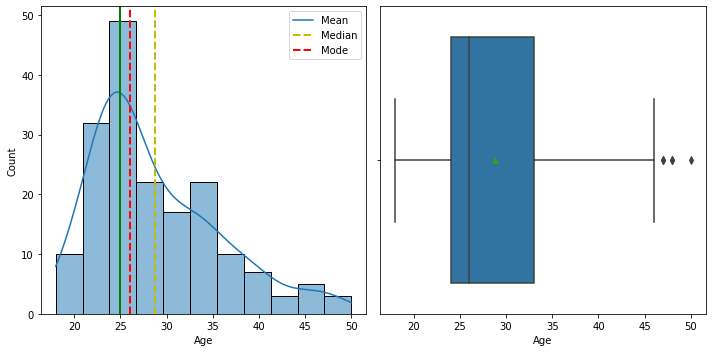

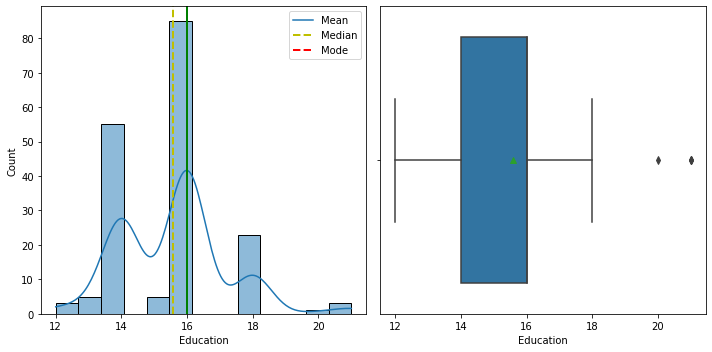

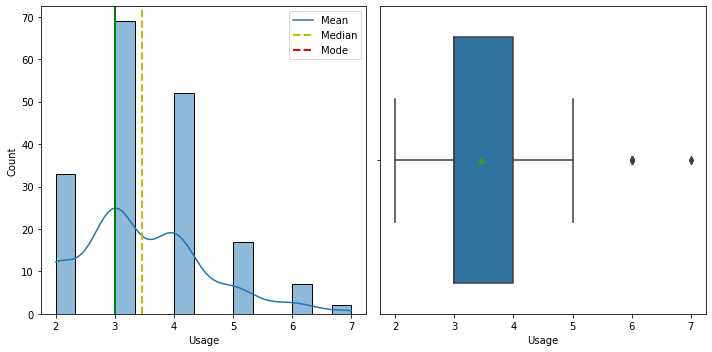

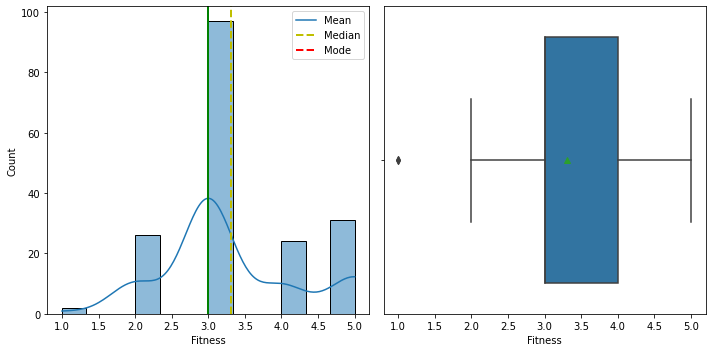

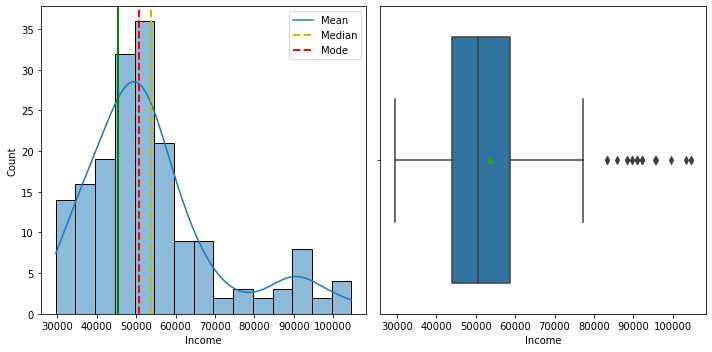

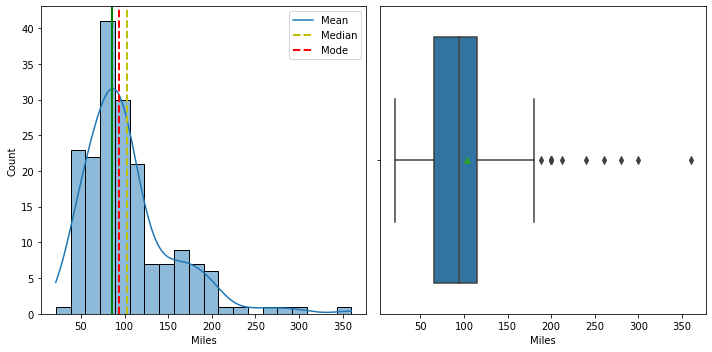

In [456]:
for i in num_cols:
    num_feat(df[i])

**Observations**:

**1.Age**
- Age is skewed towards right.
- Customers buying treadmill after age of 40 and before 20 are very less.
- There are few outliers (higher end).

**2.Education**
- Most customers have 16 years of Education.
- There are few outliers (higher end).

**3.Usage**
- Majority of users prefers to use Treadmills 3-4 times/week.
- There are few outliers (higher end).

**4.Fitness**
- Most customers have 3-3.5 fitness rating (moderate fit).
- Very few customers that uses treadmill have low score i.e 1.

**5.Income**
- Income is skewed toward right.
- Most customers have income less than 70k.
- **Significant no. of Outliers (higher end) are present** as there are very few persons who earn >80k. This makes us mandatory to handle outliers which has been taken care in the first case. Shallow copy of our dataframe(**ds_scopy**) consists of modified data after dealing with ouliers.

**6.Miles**
- Miles is skewed towards right.
- Customers run on an average 80 miles per week.
- **Significant no. of Outliers (higher end) are present**, where customers are expecting to run more than 200 miles per week.This makes us mandatory to handle outliers which has been taken care in the first case. Shallow copy of our dataframe(**ds_scopy1**) consists of modified data after dealing with ouliers.

**2.Catagorical features:**

In [357]:
df.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47

In [457]:
Product_Price = {'KP281' : '1500',
                'KP481' : '1750',
                'KP781' : '2500'}

In [458]:
df['Unit Product Price'] = df['Product'].replace(to_replace = Product_Price )
df['Unit Product Price'].value_counts()

1500    80
1750    60
2500    40
Name: Unit Product Price, dtype: int64

In [459]:
price = df['Unit Product Price'].unique()
price

array(['1500', '1750', '2500'], dtype=object)

In [460]:
quantity = df['Unit Product Price'].value_counts()
quantity

1500    80
1750    60
2500    40
Name: Unit Product Price, dtype: int64

In [461]:
for i in range(len(price)):
    tot_sale_USD = quantity[i] * int(price[i])
    print("Total sales for Aerofit treadmills of unit price ${} is ${}".format(int(price[i]),tot_sale_USD))    

Total sales for Aerofit treadmills of unit price $1500 is $120000
Total sales for Aerofit treadmills of unit price $1750 is $105000
Total sales for Aerofit treadmills of unit price $2500 is $100000


In [462]:
bins=[0,14,24,40,64,100]       
label1=['0-14','15-24','25-40','41-64','65-100']
label2=['Children',"Youth", "Young Adults","Old Adults","Seniors"]
df['Age Groups']=pd.cut(df['Age'],bins,labels = label1)
df['Age Category']=pd.cut(df['Age'],bins,labels = label2)
df.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0   KP281   18    Male         14        Single      3        4   29562   
1   KP281   19    Male         15        Single      2        3   31836   
2   KP281   19  Female         14     Partnered      4        3   30699   
3   KP281   19    Male         12        Single      3        3   32973   
4   KP281   20    Male         13     Partnered      4        2   35247   

   Miles Unit Product Price Age Groups Age Category  
0    112               1500      15-24        Youth  
1     75               1500      15-24        Youth  
2     66               1500      15-24        Youth  
3     85               1500      15-24        Youth  
4     47               1500      15-24        Youth

In [463]:
df['Age Category'].value_counts()

Young Adults    114
Youth            54
Old Adults       12
Children          0
Seniors           0
Name: Age Category, dtype: int64

In [464]:
# Change on shallow copy(df_scopy) as well for future analysis.
df_scopy['Unit Product Price'] = df_scopy['Product'].replace(to_replace = Product_Price )
df_scopy['Unit Product Price'].value_counts()
bins=[14,24,40,64]       
label1=['14-24','25-40','41-64']
label2=["Youth", "Young Adults","Old Adults"]
df_scopy['Age Groups']=pd.cut(df_scopy['Age'],bins,labels = label1)
df_scopy['Age Category']=pd.cut(df_scopy['Age'],bins,labels = label2)
df_scopy.shape

(161, 12)

In [467]:
# Changing datatype of Unit Product Price from Object to int64.
df['Unit Product Price'] = df['Unit Product Price'].astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Product             180 non-null    category
 1   Age                 180 non-null    int64   
 2   Gender              180 non-null    category
 3   Education           180 non-null    int64   
 4   MaritalStatus       180 non-null    category
 5   Usage               180 non-null    int64   
 6   Fitness             180 non-null    int64   
 7   Income              180 non-null    int64   
 8   Miles               180 non-null    int64   
 9   Unit Product Price  180 non-null    int64   
 10  Age Groups          180 non-null    category
 11  Age Category        180 non-null    category
dtypes: category(5), int64(7)
memory usage: 11.6 KB


In [468]:
#EDA on Univariate Categorical variables
def cat_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,5))
    fig.suptitle(col_data.name+' Wise Sale',fontsize=15)
    sns.countplot(col_data,ax=ax[0])
    col_data.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
    plt.tight_layout()

**1.Product**

In [470]:
print(df.Product.value_counts())

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64


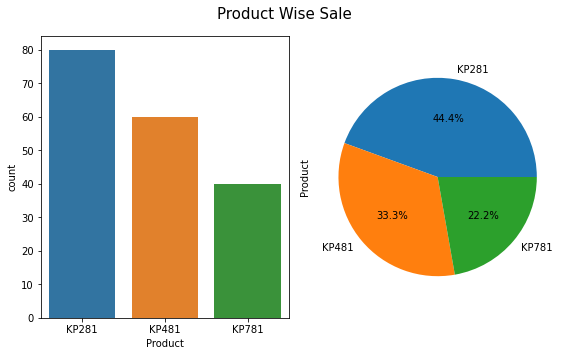

In [471]:
cat_feat(df['Product'])

**2.Gender**

In [472]:
print(df.Gender.value_counts())


Male      104
Female     76
Name: Gender, dtype: int64


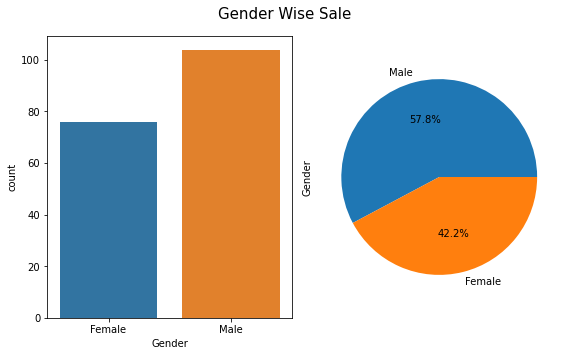

In [473]:
cat_feat(df['Gender'])

**3.MaritalStatus**

In [474]:
print(df.MaritalStatus.value_counts())

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


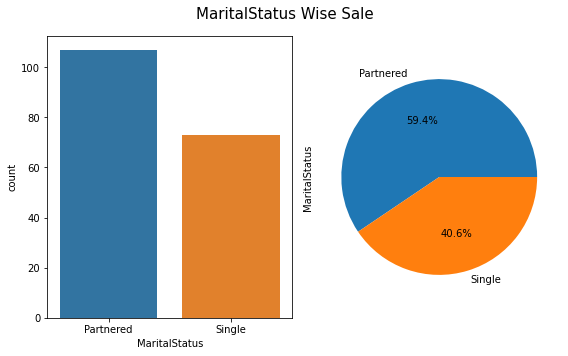

In [475]:
cat_feat(df['MaritalStatus'])

**Observations:**
- 1.**Derived Category columns** are Unit Product Price, Age Groups, Age Category
- 2. Product KP281 is the most selling model
- 3. There are more male buyers then female buyers.
- 4. Couples are buying more treadmills then singles.


# EDA - Bivariate Analysis

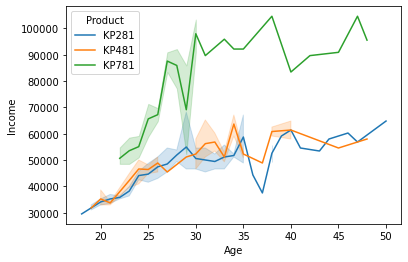

In [501]:
sns.lineplot(x='Age',y='Income',  data=df,  hue='Product')
plt.show()

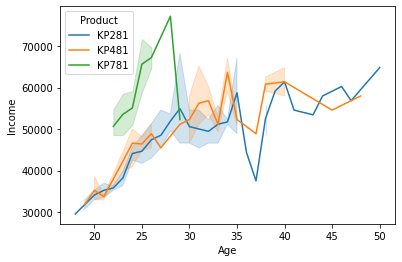

In [502]:
sns.lineplot(x='Age',y='Income',  data=df_scopy,  hue='Product')
plt.show()

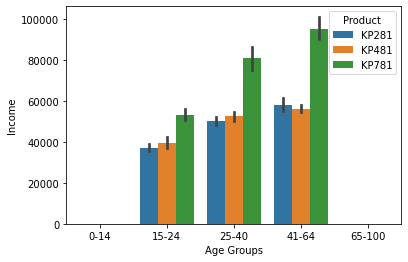

In [503]:
sns.barplot(x='Age Groups',  y='Income',hue='Product',  data=df)
plt.show()

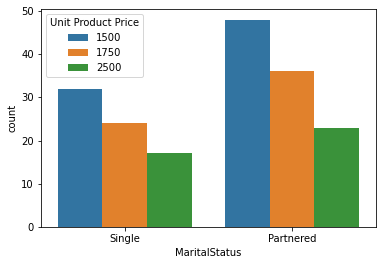

In [264]:
sns.countplot(x='MaritalStatus',
    hue='Unit Product Price',
    data=df)
plt.show()
#CONC

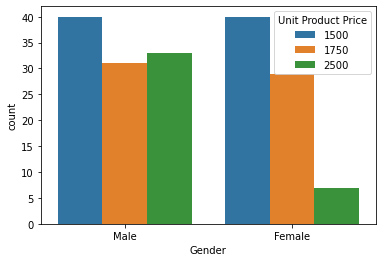

In [265]:

sns.countplot(x='Gender',
    hue='Unit Product Price',
    data=df)
plt.show()
#CONC

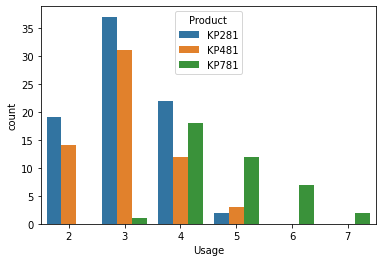

In [164]:
sns.countplot(x='Usage',
    hue='Product',
    data=df_old)
plt.show()
#CONC

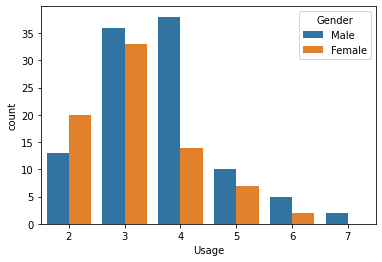

In [88]:
sns.countplot(x='Usage',
    hue='Gender',
    data=df)
plt.show()
#CONC

**Observations and Inferences**:
- From above countplot for Usage , we can clearly see that, as the no. of usage per week of a customer increases (goes beyond 3), then only there's a demand of treadmill with advanced features and highest cost(KP781-> USD 2500) which implies that if a customer is serious and is regular in running, then only he/she prefer purchasing advanced tredmill
- As the seriousness / regularity in terms of usage per week of the customer increases, they prefers treadmill with advanced features rather than low and middle range product. Which implies, Aerofit, should focus selling more advance range products to the serious customers i.e target audience should be (gym freaks, health coaches, yoga coaches, fitness enthusiast, etc)

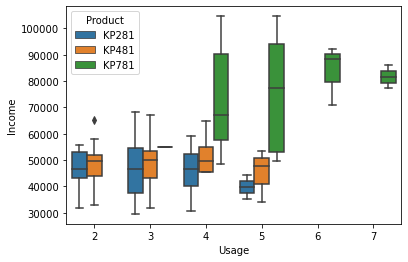

In [161]:
sns.boxplot(x='Usage',
            y = 'Income',
    hue='Product',
    data=df_old)
plt.show()
#CONC

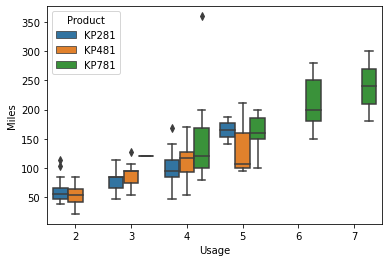

In [155]:
sns.boxplot(x='Usage',
            y = 'Miles',
    hue='Product',
    data=df_old)
plt.show()
#CONC

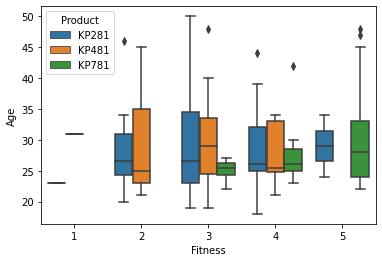

In [160]:
sns.boxplot(x='Fitness',
            y = 'Age',
    hue='Product',
    data=df_old)
plt.show()
#CONC

**Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)**

df.info()

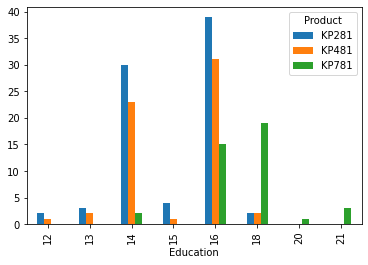

In [504]:
pd.crosstab(df['Education'] ,df['Product']).plot(kind= 'bar')
plt.show()

In [496]:
df.groupby(by='Product')['Age'].mean() ##Average age of buying product models

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

In [497]:
df.groupby('Product')['Income'].mean() ##Average income o buying each model

Product
KP281    46418.025
KP481    48973.650
KP781    75441.575
Name: Income, dtype: float64

In [498]:
print(df[['Product','Gender']].value_counts().sort_index()) ## models bought by different Genders


Product  Gender
KP281    Female    40
         Male      40
KP481    Female    29
         Male      31
KP781    Female     7
         Male      33
dtype: int64


In [266]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True)

Product  KP281  KP481  KP781  All
Gender                           
Female      40     29      7   76
Male        40     31     33  104
All         80     60     40  180

In [267]:
marg_prob = round(pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize=True)*100,2)
marg_prob

Product  KP281  KP481  KP781     All
Gender                              
Female   22.22  16.11   3.89   42.22
Male     22.22  17.22  18.33   57.78
All      44.44  33.33  22.22  100.00

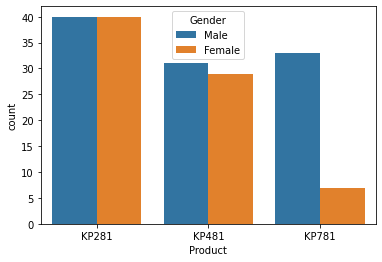

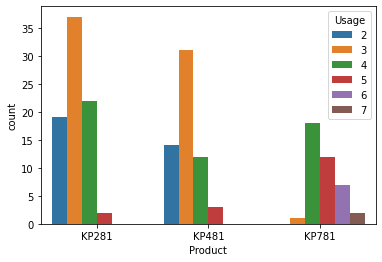

In [269]:
sns.countplot(x='Product',hue='Usage',data=df)
plt.show()

In [270]:
#top product usage is more among people who are buying it

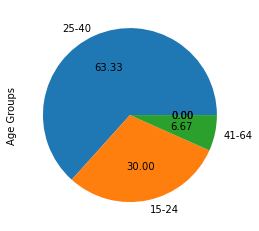

In [276]:
df['Age Groups'].value_counts().plot(kind = 'pie',autopct='%.2f')
plt.show()

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Product             180 non-null    object  
 1   Age                 180 non-null    int64   
 2   Gender              180 non-null    object  
 3   Education           180 non-null    int64   
 4   MaritalStatus       180 non-null    object  
 5   Usage               180 non-null    int64   
 6   Fitness             180 non-null    int64   
 7   Income              180 non-null    int64   
 8   Miles               180 non-null    int64   
 9   Unit Product Price  180 non-null    object  
 10  Age Groups          180 non-null    category
 11  Age Category        180 non-null    category
dtypes: category(2), int64(6), object(4)
memory usage: 15.0+ KB


In [279]:
df['Age Category'].value_counts()

Young Adults    114
Youth            54
Old Adults       12
Children          0
Seniors           0
Name: Age Category, dtype: int64

In [301]:
df_age = df_age_new.groupby('Age Category')[['Income']].count()
df_age

Income
Age Category        
Youth             54
Young Adults      99
Old Adults         8

In [305]:
df.groupby(['Gender','MaritalStatus','Product'])['Miles']

In [314]:
df_cond_prob = df_age_new.groupby(['Gender','Age Category','Product']).sum()['Income'].unstack()
df_cond_prob.reset_index()

Product  Gender  Age Category    KP281    KP481   KP781
0        Female         Youth   483225   288798  105827
1        Female  Young Adults  1174521  1141959  130727
2        Female    Old Adults   183057        0       0
3          Male         Youth   520746   385443  427145
4          Male  Young Adults  1187028  1009656  592628
5          Male    Old Adults   164865   112563       0

# Checking correlation among different features

In [485]:
df.corr()

Age  Education     Usage   Fitness    Income  \
Age                 1.000000   0.280496  0.015064  0.061105  0.513414   
Education           0.280496   1.000000  0.395155  0.410581  0.625827   
Usage               0.015064   0.395155  1.000000  0.668606  0.519537   
Fitness             0.061105   0.410581  0.668606  1.000000  0.535005   
Income              0.513414   0.625827  0.519537  0.535005  1.000000   
Miles               0.036618   0.307284  0.759130  0.785702  0.543473   
Unit Product Price  0.029263   0.563463  0.623124  0.696616  0.695847   

                       Miles  Unit Product Price  
Age                 0.036618            0.029263  
Education           0.307284            0.563463  
Usage               0.759130            0.623124  
Fitness             0.785702            0.696616  
Income              0.543473            0.695847  
Miles               1.000000            0.643923  
Unit Product Price  0.643923            1.000000

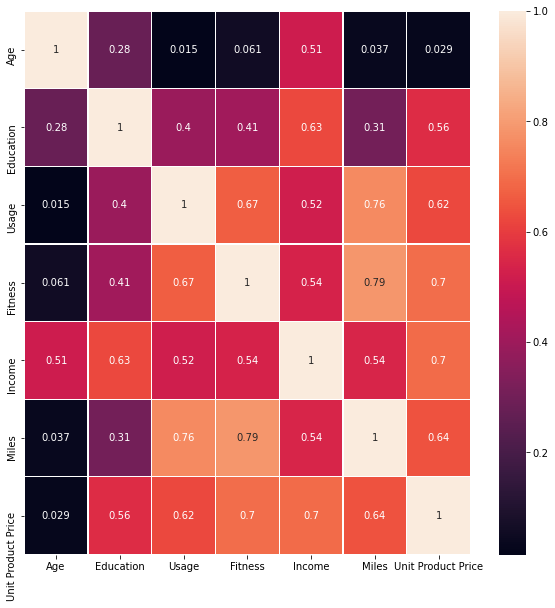

In [488]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.3, linecolor='white')
plt.show()

**Inferences**:

- Age,Education,Usage,Fitness & Miles has significant correlation with Income and vice versa.
- Usage and Fitness are highly correlated with Miles and vice versa.

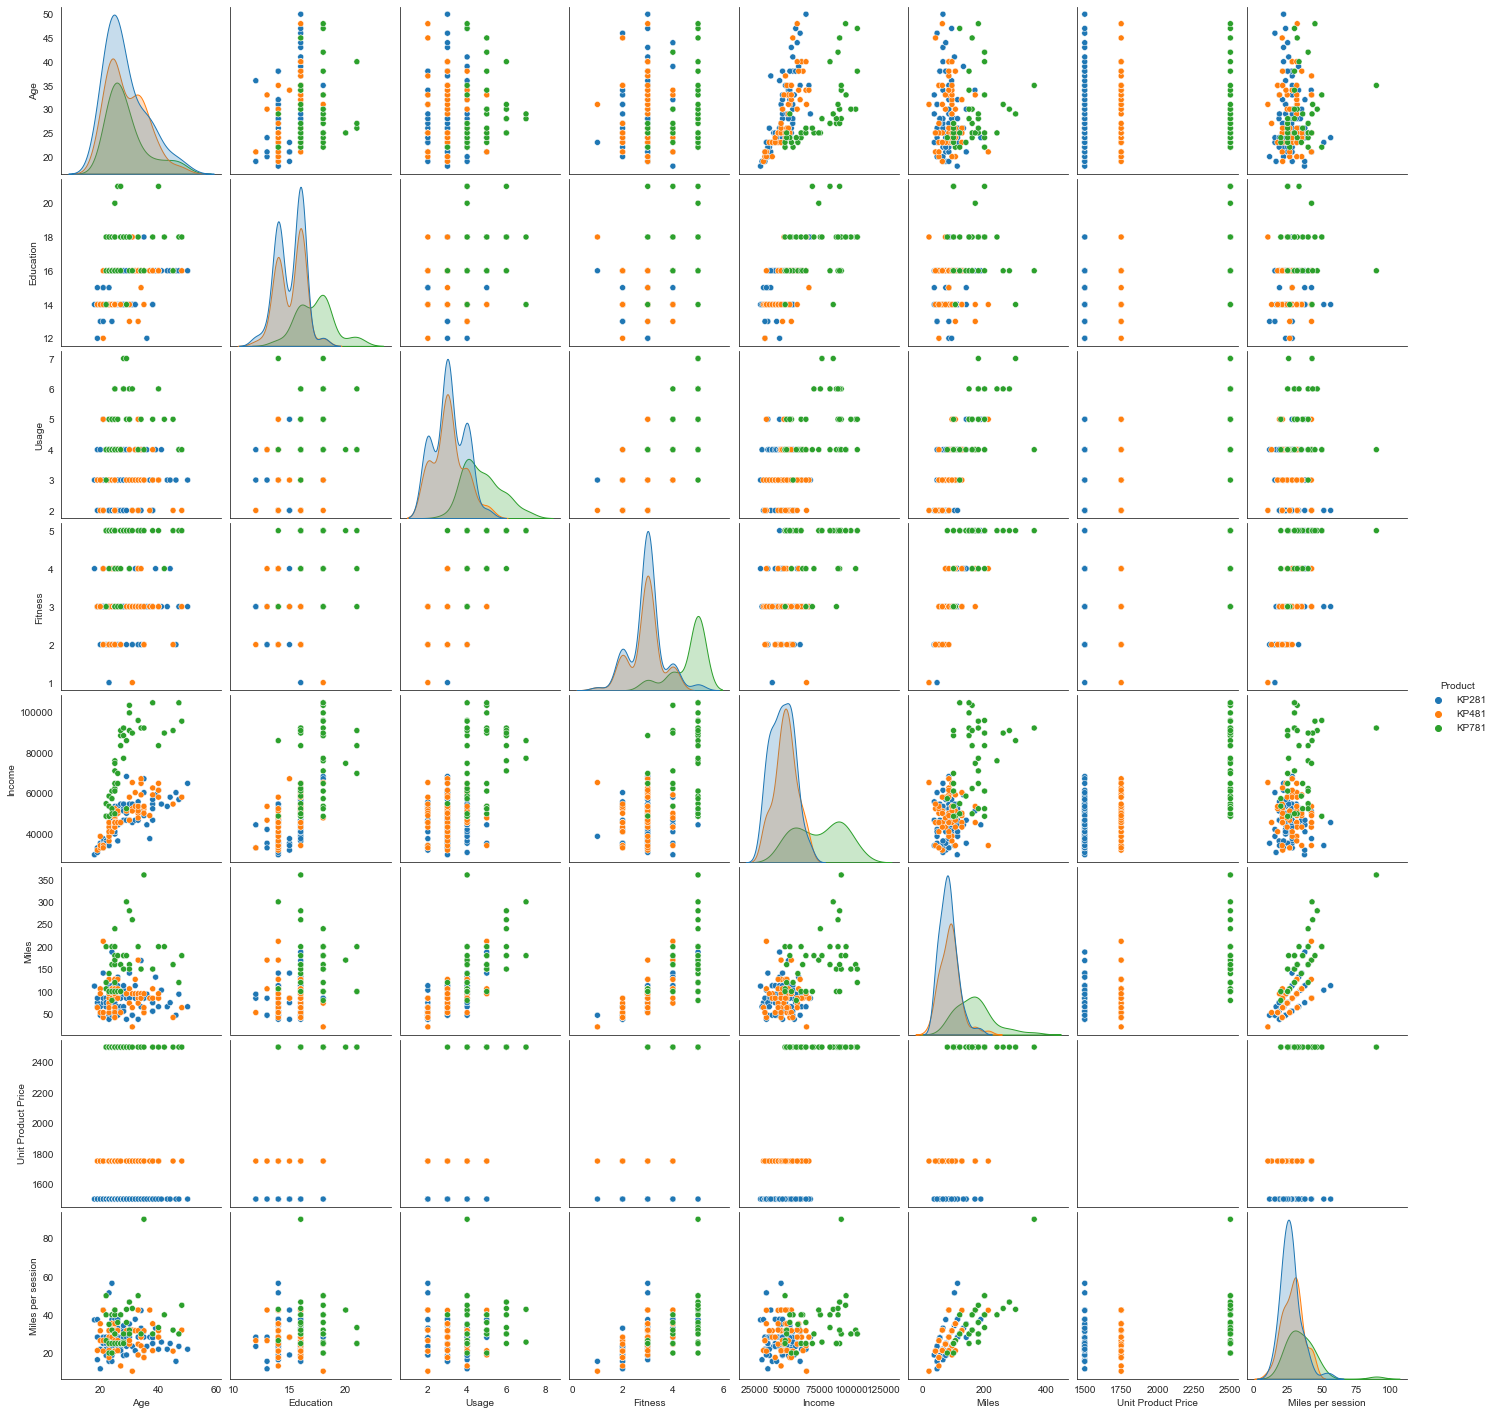

In [514]:
#Quick overview of the data

sns.set_style('white')
sns.pairplot(df,hue='Product')
plt.show()

# Multivariate Analysis

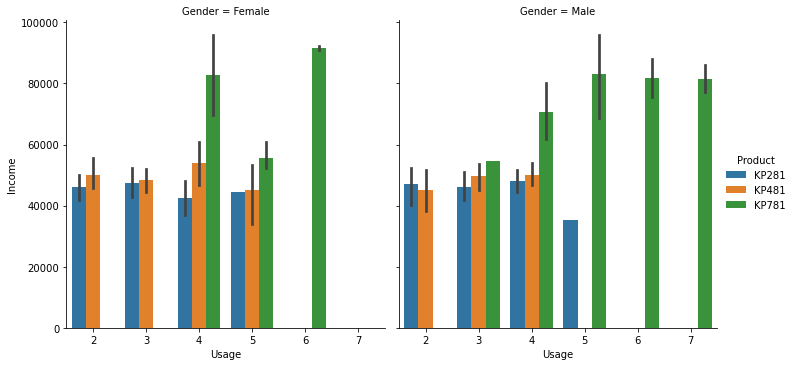

In [491]:
sns.catplot(x='Usage', y='Income', col='Gender',hue='Product' ,kind="bar", data=df) 
plt.show()

- Customers having lower income range (<60K) prefer to buy models KP281 & KP481 and expect to use treadmill 2-5 times/week.
- Mostly Higher earning customers bought KP781 and expect to use treadmill 4-6 times/week.

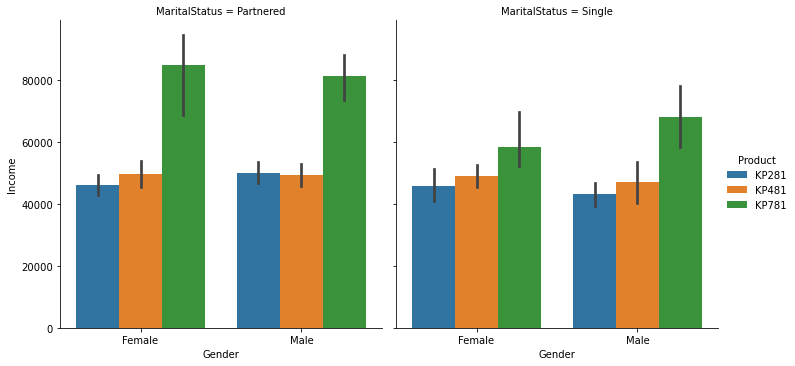

In [492]:
sns.catplot(x='Gender',y='Income', hue='Product', col='MaritalStatus', data=df,kind='bar')
plt.show()

In [493]:
pd.crosstab(index=df['Product'], columns=[df['MaritalStatus'],df['Gender']] )  

MaritalStatus Partnered      Single     
Gender           Female Male Female Male
Product                                 
KP281                27   21     13   19
KP481                15   21     14   10
KP781                 4   19      3   14

- Partnered Female bought KP281 Model compared to Partnered male.
- Partnered Male customers bought KP481 & KP781 models more than Single Male customers.
- Single Female customers bought KP481 model more than Single male customers.
- Single Male customers bought KP281 & KP781 models compared to Single females.
- The majority of treadmill buyers are men.

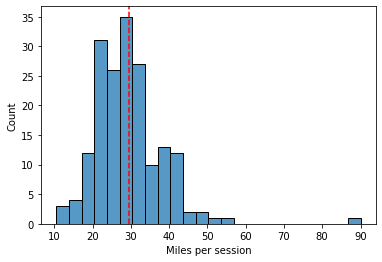

In [508]:
#Some information on how many miles are run per week or per session: TM498 is used for longer sessions
df['Miles per session'] = df['Miles']/df['Usage']
sns.histplot(x='Miles per session', data=df)
plt.axvline(np.mean(df['Miles per session']),color='r',linestyle='--')
plt.xlabel('Miles per session')
plt.show()


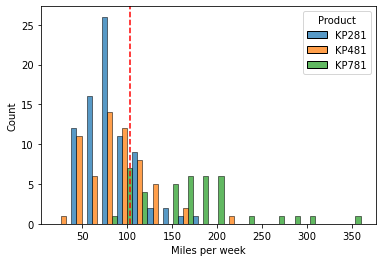

In [507]:

sns.histplot(x='Miles',data=df,hue='Product',multiple='dodge')
plt.axvline(np.mean(df['Miles']),color='r',linestyle='--')
plt.xlabel('Miles per week')
plt.show()

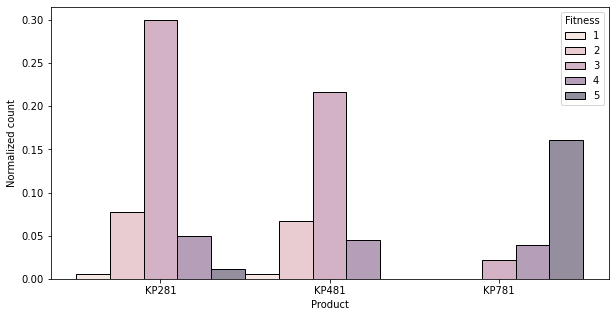

In [509]:
#Education level is directly correlated with income as highlighted in the pairplot and correlation heatmap above, so highly educated indviduals are more likely to purchase the more expensive model 
fig, ax = plt.subplots(figsize=[10,5])
sns.histplot(x='Product',data=df,hue='Fitness',alpha=0.5, element='bars',stat='density',multiple='dodge')
plt.ylabel('Normalized count')
plt.show()


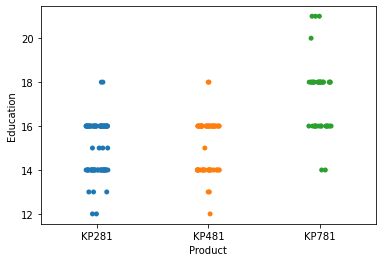

In [510]:
sns.stripplot(x='Product',y='Education',data=df)
plt.show()


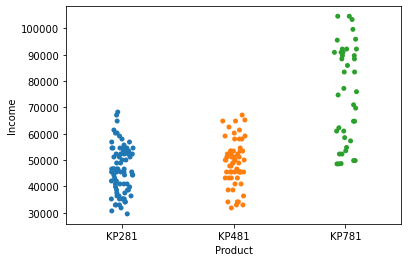

In [511]:
sns.stripplot(x='Product',y='Income',data=df)
plt.show()

# Final Observation

- KP281 model is the most purchased model (44.4%) then TM498 (33.3%). 
- KP781 is the least sold model (22.2%).
- There are more Male customers (57.8%) than Female customers (42.2%).
- Average Usage of Males is more than Average usage of Females.
- Customers buying treadmill are younger and average age of customer is 28.
- Most of the customers earns less than 70K and prefer KP281 & KP481 models.
- 59.4% of the customers who purchased treadmill are partnered.
- Customers average education is 16.

**Customer Profiles**

**1. KP281**

- Customers who bought this treadmill have income less than 60k with an average of 55K.
- This model has same level of popularity in Male customers as well as Female customers as it has same numbers of Male and Female customers.
- Average age of customer who purchases KP281 is 28.5.
- This model is popular among Bachelors as average years of education of customers for this product is 15.
- Self rate fitness level of customer is average.
- Customers expect to use this treadmill 3-4 times a week.
- It is the most popular model (in all genders) because of its appealing price and affordability with 33.3% of sales.
- Customers who bought this treadmill want fitness level atleast average and maybe they were looking for a basic treadmill with appealing price that also does the job.

**2. KP481**

- This model is second most sold model with 33.3% of sales.
- Customers with lower income purchase KP281 and KP481 model may be because of lower cost of the Treadmill.
- Average age of customer who purchases KP481 is 29.
- This model is popular among Bachelors as average years of education of customers for this product is 16.
- Customers expecting KP481 model to use less frequently but to run more miles per week on this.
- This model is popular more in Single Female customers compare to Single male customers may be because of difference in provided features or color scheme.

**3. KP781**

- This is the least sold product(22.2% sales) in company lineup of Treadmill may be because of it heafty price range making it Company's Premium product.
- This model is popular with customers having high income range as average Income is 75K .
- Average age of customer who purchases KP781 is 29.
- This model is popular among Customers with higher education as average education is 17 years.
- Treadmill may have some advanced features as people with high income are ready to spend money to buy this model
- Customers expected usage on this model is 4-5 day a week with moderate Miles to run having average 166 miles per week.
- Male customers who are more serious about fitness or Professionals buy this mode (self fitness rating 3-5).

In [505]:
ProfileReport(df_scopy)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]